#### **Bu notebook'un amacı:**
1. Her marketing channel'ın detaylı performans analizi
2. Platform ve tool effectiveness comparison
3. Customer segmentation by channel
4. ROI optimization recommendations
5. Business actionable insights

Analysis Framework:
- Descriptive: Ne oluyor? (metrics, distributions)
- Diagnostic: Neden oluyor? (correlations, patterns)
- Prescriptive: Ne yapmalı? (recommendations)

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
df = pd.read_csv('../data/marketing_analytics_featured.csv')

print("📊 CHANNEL ANALYTICS - DATA OVERVIEW")
print("="*70)
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {'N/A' if 'Date' not in df.columns else 'Available'}")
print(f"\nChannels: {df['CampaignChannel'].nunique()}")
print(f"Platforms: {df['AdvertisingPlatform'].nunique()}")
print(f"Tools: {df['AdvertisingTool'].nunique()}")

📊 CHANNEL ANALYTICS - DATA OVERVIEW
Dataset Shape: (48000, 37)
Date Range: N/A

Channels: 7
Platforms: 7
Tools: 6


#### **CHANNEL OVERVIEW - KEY METRICS**
1. Volume Metrics
   - Total customers, Total spend

2. Efficiency Metrics (ne kadar verimli?)
   - CTR, Conversion Rate, CPA

3. Value Metrics (ne kadar değerli?)
   - Average income, Customer value score

In [4]:
# Aggregate by channel
channel_metrics = df.groupby('CampaignChannel').agg({
    'CustomerID': 'count',                    # Volume
    'AdSpend': ['sum', 'mean'],               # Cost
    'ClickThroughRate': 'mean',               # Efficiency
    'ConversionRate': 'mean',                 # Efficiency
    'Conversion': ['sum', 'mean'],            # Results
    'Income': 'mean',                         # Customer value
    'LoyaltyPoints': 'mean',                  # Customer value
    'WebsiteVisits': 'mean',                  # Engagement
    'TimeOnSite': 'mean'                      # Engagement
}).round(4)

In [5]:
# Flatten column names
channel_metrics.columns = [
    'Total_Customers', 'Total_AdSpend', 'Avg_AdSpend',
    'Avg_CTR', 'Avg_ConversionRate', 'Total_Conversions', 'Conversion_Rate',
    'Avg_Income', 'Avg_LoyaltyPoints', 'Avg_WebsiteVisits', 'Avg_TimeOnSite'
]

# Calculate derived metrics
channel_metrics['CPA'] = channel_metrics['Total_AdSpend'] / (channel_metrics['Total_Conversions'] + 1)
channel_metrics['ROI_Proxy'] = (channel_metrics['Avg_ConversionRate'] * channel_metrics['Avg_Income']) / (channel_metrics['Avg_AdSpend'] + 1)

# Sort by conversion rate
channel_metrics = channel_metrics.sort_values('Conversion_Rate', ascending=False)

print("\n📋 CHANNEL METRICS TABLE:")



📋 CHANNEL METRICS TABLE:


In [6]:
print(channel_metrics)

                 Total_Customers  Total_AdSpend  Avg_AdSpend  Avg_CTR  \
CampaignChannel                                                         
Referral                    3834     5776906.96    1506.7572   0.0794   
Email                      11973    18101197.49    1511.8348   0.0780   
Display                     2378     3593182.84    1511.0104   0.0781   
PPC                         8644    12994100.44    1503.2509   0.0787   
Social Media               14405    21839223.99    1516.0864   0.0778   
SEO                         5774     8719719.52    1510.1696   0.0778   
Affiliate                    992     1475240.86    1487.1380   0.0788   

                 Avg_ConversionRate  Total_Conversions  Conversion_Rate  \
CampaignChannel                                                           
Referral                     0.0315                 93           0.0243   
Email                        0.0313                285           0.0238   
Display                      0.0313       


📈 CHANNEL PERFORMANCE VISUALIZATIONS


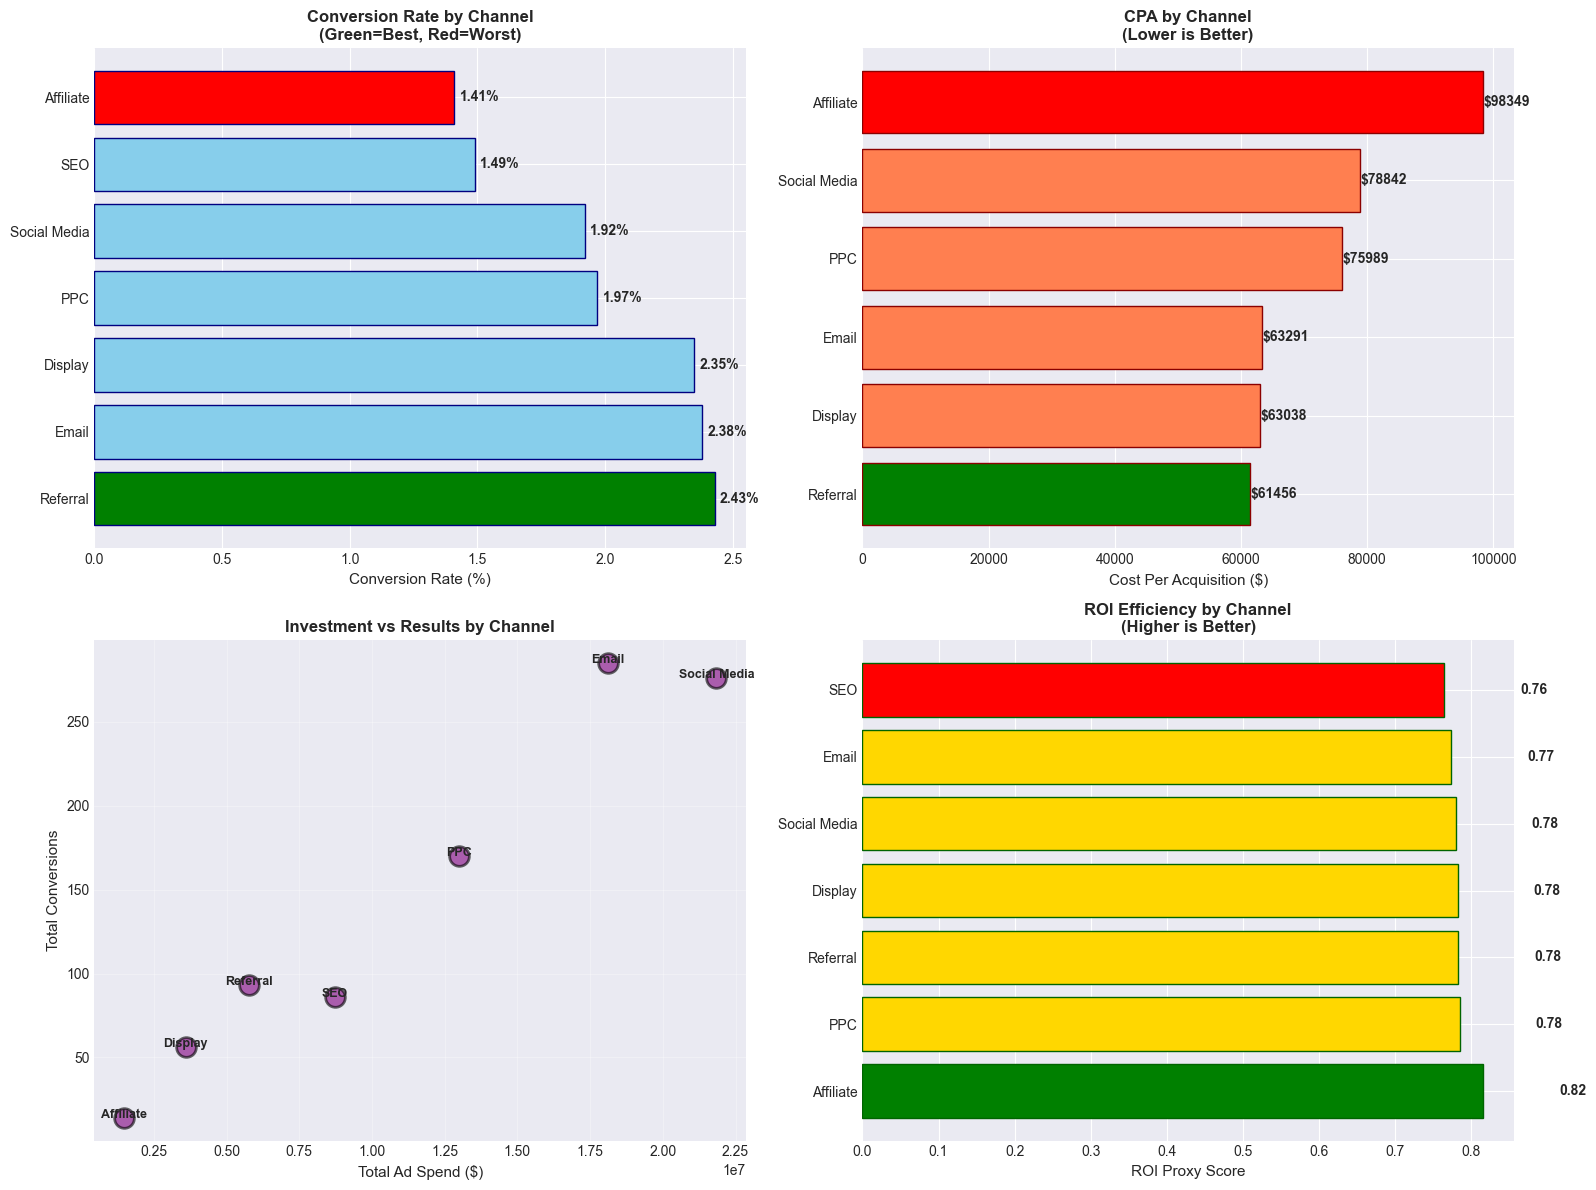


✅ Visualizations saved to: ../reports/03_channels/03_channels/channel_performance_overview.png


In [7]:
print("\n" + "="*70)
print("📈 CHANNEL PERFORMANCE VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Conversion Rate by Channel
ax1 = axes[0, 0]
conv_rates = channel_metrics['Conversion_Rate'].sort_values(ascending=False) * 100
colors = ['green' if i == 0 else 'red' if i == len(conv_rates)-1 else 'skyblue'
          for i in range(len(conv_rates))]
bars1 = ax1.barh(conv_rates.index, conv_rates.values, color=colors, edgecolor='navy')
ax1.set_xlabel('Conversion Rate (%)', fontsize=11)
ax1.set_title('Conversion Rate by Channel\n(Green=Best, Red=Worst)', fontsize=12, fontweight='bold')
for i, (idx, val) in enumerate(conv_rates.items()):
    ax1.text(val + 0.02, i, f'{val:.2f}%', va='center', fontsize=10, fontweight='bold')


# 2. Cost Per Acquisition (CPA)
ax2 = axes[0, 1]
cpa_data = channel_metrics['CPA'].sort_values()
cpa_data = cpa_data[cpa_data < cpa_data.quantile(0.95)]  # Remove extreme outliers
colors2 = ['green' if i == 0 else 'red' if i == len(cpa_data)-1 else 'coral'
           for i in range(len(cpa_data))]
bars2 = ax2.barh(cpa_data.index, cpa_data.values, color=colors2, edgecolor='darkred')
ax2.set_xlabel('Cost Per Acquisition ($)', fontsize=11)
ax2.set_title('CPA by Channel\n(Lower is Better)', fontsize=12, fontweight='bold')
for i, (idx, val) in enumerate(cpa_data.items()):
    ax2.text(val + 50, i, f'${val:.0f}', va='center', fontsize=10, fontweight='bold')


# 3. Total Ad Spend vs Total Conversions
ax3 = axes[1, 0]
scatter_data = channel_metrics[['Total_AdSpend', 'Total_Conversions']].copy()
ax3.scatter(scatter_data['Total_AdSpend'], scatter_data['Total_Conversions'],
            s=200, alpha=0.6, c='purple', edgecolors='black', linewidth=2)
for idx, row in scatter_data.iterrows():
    ax3.annotate(idx, (row['Total_AdSpend'], row['Total_Conversions']),
                 fontsize=9, fontweight='bold', ha='center')
ax3.set_xlabel('Total Ad Spend ($)', fontsize=11)
ax3.set_ylabel('Total Conversions', fontsize=11)
ax3.set_title('Investment vs Results by Channel', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# 4. ROI Proxy by Channel
ax4 = axes[1, 1]
roi_data = channel_metrics['ROI_Proxy'].sort_values(ascending=False)
colors4 = ['green' if i == 0 else 'red' if i == len(roi_data)-1 else 'gold'
           for i in range(len(roi_data))]
bars4 = ax4.barh(roi_data.index, roi_data.values, color=colors4, edgecolor='darkgreen')
ax4.set_xlabel('ROI Proxy Score', fontsize=11)
ax4.set_title('ROI Efficiency by Channel\n(Higher is Better)', fontsize=12, fontweight='bold')
for i, (idx, val) in enumerate(roi_data.items()):
    ax4.text(val + 0.1, i, f'{val:.2f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/03_channels/channel_performance_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved to: ../reports/03_channels/03_channels/channel_performance_overview.png")



#### **PLATFORM ANALYSIS (Google vs Facebook vs Instagram vs LinkedIn)**

In [8]:
print("\n" + "="*70)
print("🌐 PLATFORM PERFORMANCE ANALYSIS")
print("="*70)

# Platform metrics
platform_metrics = df.groupby('AdvertisingPlatform').agg({
    'CustomerID': 'count',
    'Conversion': ['sum', 'mean'],
    'AdSpend': ['sum', 'mean'],
    'ClickThroughRate': 'mean',
    'ConversionRate': 'mean'
}).round(4)

platform_metrics.columns = ['Total_Customers', 'Total_Conversions', 'Conversion_Rate',
                             'Total_AdSpend', 'Avg_AdSpend', 'Avg_CTR', 'Avg_ConversionRate']

platform_metrics['CPA'] = platform_metrics['Total_AdSpend'] / (platform_metrics['Total_Conversions'] + 1)
platform_metrics = platform_metrics.sort_values('Conversion_Rate', ascending=False)

print("\n📋 PLATFORM METRICS:")
print(platform_metrics.to_string())



🌐 PLATFORM PERFORMANCE ANALYSIS

📋 PLATFORM METRICS:
                     Total_Customers  Total_Conversions  Conversion_Rate  Total_AdSpend  Avg_AdSpend  Avg_CTR  Avg_ConversionRate           CPA
AdvertisingPlatform                                                                                                                            
Facebook                        6751                151           0.0224    10212430.30    1512.7285   0.0808              0.0314  67187.041447
Instagram                       6826                147           0.0215    10286558.70    1506.9673   0.0772              0.0312  69503.775000
TikTok                          6955                148           0.0213    10468451.11    1505.1691   0.0783              0.0311  70258.061141
LinkedIn                        6864                144           0.0210    10375728.90    1511.6155   0.0767              0.0315  71556.751034
Twitter                         6805                136           0.0200    102612

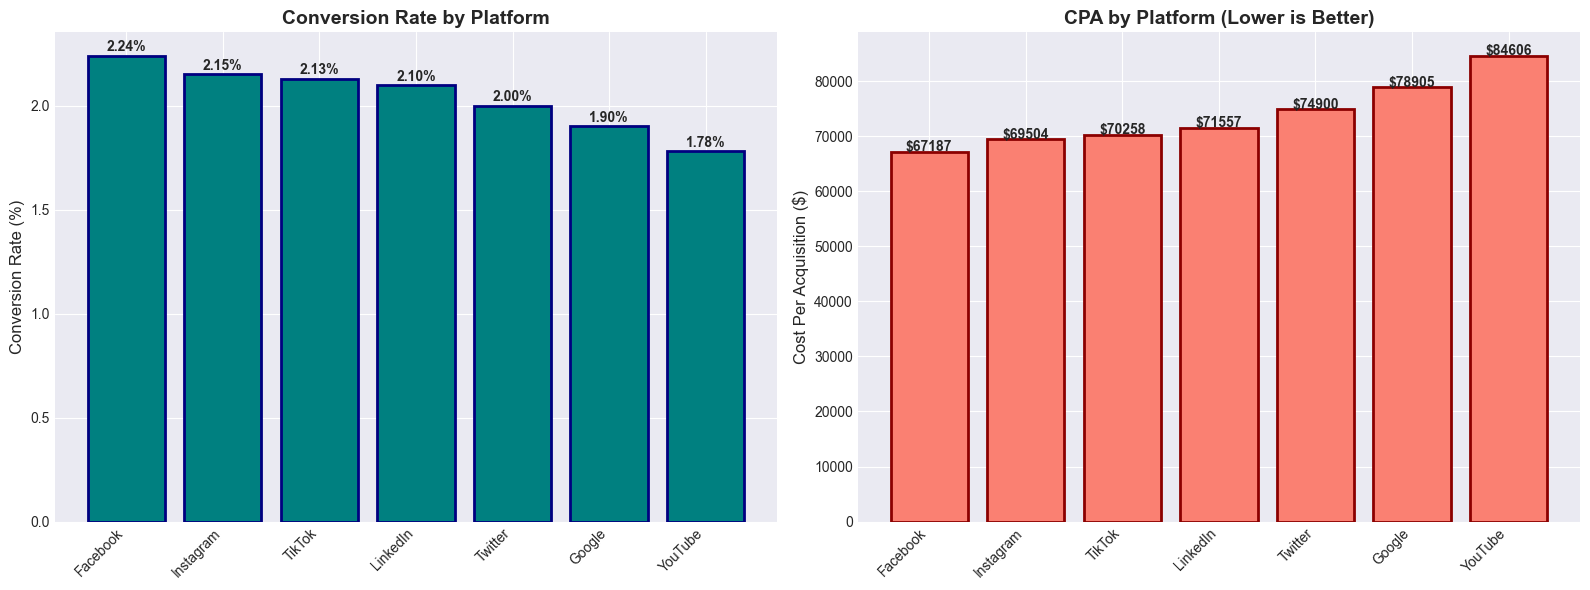


✅ Platform analysis saved to: ../reports/03_channels/platform_analysis.png


In [9]:
# Platform visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Platform conversion rates
ax1 = axes[0]
conv_by_platform = (platform_metrics['Conversion_Rate'] * 100).sort_values(ascending=False)
bars = ax1.bar(range(len(conv_by_platform)), conv_by_platform.values,
               color='teal', edgecolor='navy', linewidth=2)
ax1.set_xticks(range(len(conv_by_platform)))
ax1.set_xticklabels(conv_by_platform.index, rotation=45, ha='right')
ax1.set_ylabel('Conversion Rate (%)', fontsize=12)
ax1.set_title('Conversion Rate by Platform', fontsize=14, fontweight='bold')
for i, val in enumerate(conv_by_platform.values):
    ax1.text(i, val + 0.02, f'{val:.2f}%', ha='center', fontsize=10, fontweight='bold')

# Platform CPA
ax2 = axes[1]
cpa_by_platform = platform_metrics['CPA'].sort_values()
bars2 = ax2.bar(range(len(cpa_by_platform)), cpa_by_platform.values,
                color='salmon', edgecolor='darkred', linewidth=2)
ax2.set_xticks(range(len(cpa_by_platform)))
ax2.set_xticklabels(cpa_by_platform.index, rotation=45, ha='right')
ax2.set_ylabel('Cost Per Acquisition ($)', fontsize=12)
ax2.set_title('CPA by Platform (Lower is Better)', fontsize=14, fontweight='bold')
for i, val in enumerate(cpa_by_platform.values):
    ax2.text(i, val + 50, f'${val:.0f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/03_channels/platform_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Platform analysis saved to: ../reports/03_channels/platform_analysis.png")



#### **TOOL EFFECTIVENESS (Google Ads vs Meta Ads Manager vs SEMrush)**


🛠️ ADVERTISING TOOL EFFECTIVENESS

📋 TOOL METRICS:
                  Total_Customers  Total_Conversions  Conversion_Rate  Total_AdSpend  Avg_AdSpend  Avg_CTR  Avg_ConversionRate           CPA
AdvertisingTool                                                                                                                             
Hootsuite                    7931                180           0.0227    11909702.55    1501.6647   0.0781              0.0314  65799.461602
MailChimp                    8143                184           0.0226    12305091.48    1511.1251   0.0773              0.0315  66514.008000
HubSpot                      8015                161           0.0201    12137488.80    1514.3467   0.0790              0.0316  74922.770370
Google Ads                   7954                157           0.0197    12046880.64    1514.5689   0.0786              0.0313  76246.080000
SEMrush                      7949                150           0.0189    12023639.93    1512.5978   0.

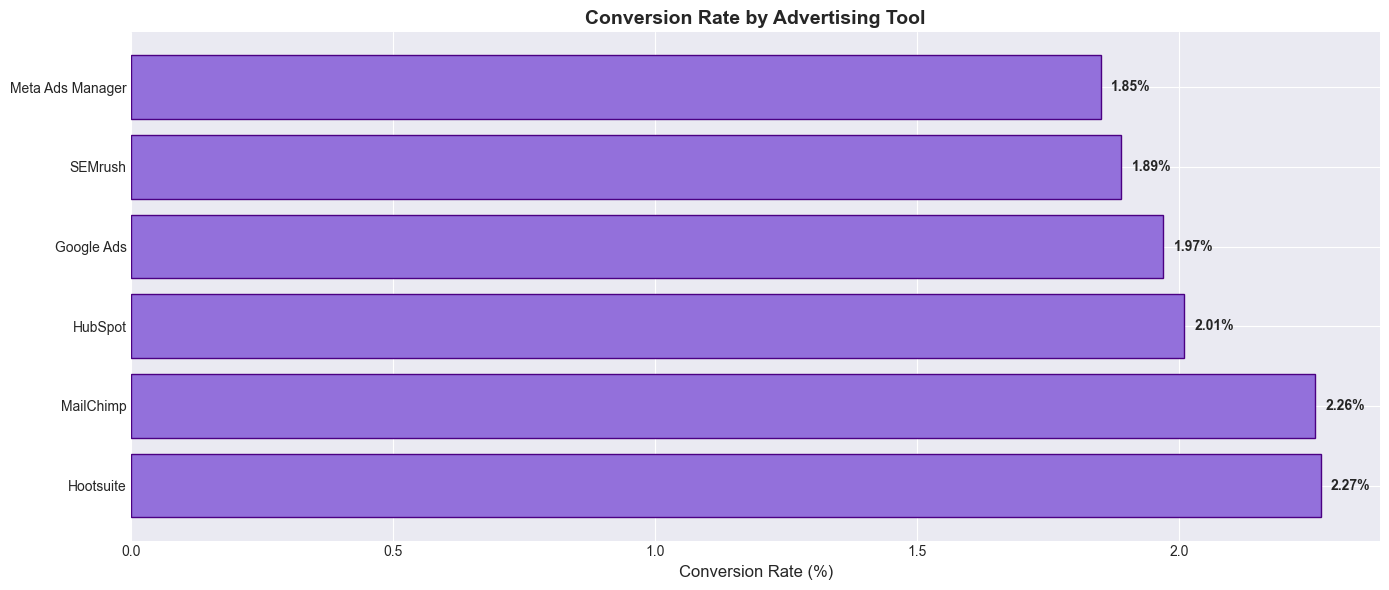


✅ Tool effectiveness saved to: ../reports/03_channels/tool_effectiveness.png


In [10]:
print("\n" + "="*70)
print("🛠️ ADVERTISING TOOL EFFECTIVENESS")
print("="*70)

# Tool metrics
tool_metrics = df.groupby('AdvertisingTool').agg({
    'CustomerID': 'count',
    'Conversion': ['sum', 'mean'],
    'AdSpend': ['sum', 'mean'],
    'ClickThroughRate': 'mean',
    'ConversionRate': 'mean'
}).round(4)

tool_metrics.columns = ['Total_Customers', 'Total_Conversions', 'Conversion_Rate',
                        'Total_AdSpend', 'Avg_AdSpend', 'Avg_CTR', 'Avg_ConversionRate']

tool_metrics['CPA'] = tool_metrics['Total_AdSpend'] / (tool_metrics['Total_Conversions'] + 1)
tool_metrics = tool_metrics.sort_values('Conversion_Rate', ascending=False)

print("\n📋 TOOL METRICS:")
print(tool_metrics.to_string())

# Tool visualization
plt.figure(figsize=(14, 6))
conv_by_tool = (tool_metrics['Conversion_Rate'] * 100).sort_values(ascending=False)
bars = plt.barh(conv_by_tool.index, conv_by_tool.values, color='mediumpurple', edgecolor='indigo')
plt.xlabel('Conversion Rate (%)', fontsize=12)
plt.title('Conversion Rate by Advertising Tool', fontsize=14, fontweight='bold')
for i, (idx, val) in enumerate(conv_by_tool.items()):
    plt.text(val + 0.02, i, f'{val:.2f}%', va='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/03_channels/tool_effectiveness.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Tool effectiveness saved to: ../reports/03_channels/tool_effectiveness.png")


#### **CUSTOMER SEGMENTATION BY CHANNEL**
QUESTION: Hangi channel hangi customer segment'e uygun?

Segmentation dimensions:
- Age Group
- Income Tier
- Loyalty Tier


In [11]:
print("\n" + "="*70)
print("👥 CUSTOMER SEGMENTATION BY CHANNEL")
print("="*70)

# Age Group × Channel
print("\n📊 AGE GROUP DISTRIBUTION BY CHANNEL:")
age_channel = pd.crosstab(df['CampaignChannel'], df['Age_Group'], normalize='index') * 100
print(age_channel.round(2).to_string())

# Income Tier × Channel
print("\n💰 INCOME TIER DISTRIBUTION BY CHANNEL:")
income_channel = pd.crosstab(df['CampaignChannel'], df['Income_Tier'], normalize='index') * 100
print(income_channel.round(2).to_string())



👥 CUSTOMER SEGMENTATION BY CHANNEL

📊 AGE GROUP DISTRIBUTION BY CHANNEL:
Age_Group        Adult  MiddleAge  Senior  YoungAdult
CampaignChannel                                      
Affiliate        33.27      36.29   17.54       12.90
Display          33.85      36.33   17.62       12.20
Email            34.37      34.67   18.81       12.15
PPC              33.87      35.49   18.41       12.23
Referral         33.96      34.90   19.25       11.89
SEO              34.71      34.95   18.03       12.31
Social Media     34.39      34.69   18.42       12.50

💰 INCOME TIER DISTRIBUTION BY CHANNEL:
Income_Tier       High    Low  Medium  VeryHigh
CampaignChannel                                
Affiliate        24.80  27.12   24.50     23.59
Display          24.73  24.47   24.73     26.07
Email            25.07  25.17   25.29     24.46
PPC              24.69  25.02   24.97     25.32
Referral         25.64  25.01   24.99     24.36
SEO              24.00  25.86   25.53     24.61
Social Media    

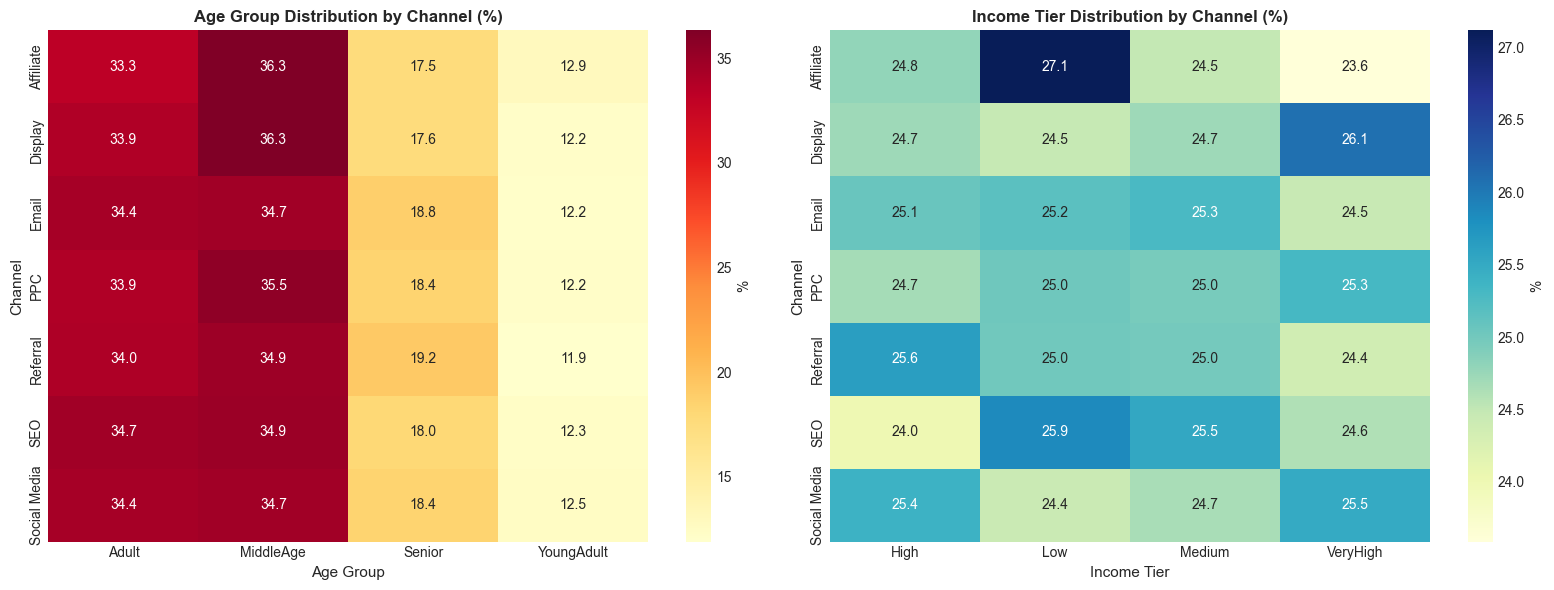


✅ Segmentation heatmaps saved to: ../reports/03_channels/customer_segmentation_by_channel.png


In [12]:
# Visualization: Heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age × Channel heatmap
ax1 = axes[0]
sns.heatmap(age_channel, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': '%'})
ax1.set_title('Age Group Distribution by Channel (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=11)
ax1.set_ylabel('Channel', fontsize=11)

# Income × Channel heatmap
ax2 = axes[1]
sns.heatmap(income_channel, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax2, cbar_kws={'label': '%'})
ax2.set_title('Income Tier Distribution by Channel (%)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Income Tier', fontsize=11)
ax2.set_ylabel('Channel', fontsize=11)

plt.tight_layout()
plt.savefig('../reports/03_channels/customer_segmentation_by_channel.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Segmentation heatmaps saved to: ../reports/03_channels/customer_segmentation_by_channel.png")


#### **CHANNEL × CAMPAIGN TYPE INTERACTION**

QUESTION: Hangi channel hangi campaign type'da daha iyi?

Campaign Types:
- Awareness
- Consideration
- Conversion
- Retention


🎯 CHANNEL × CAMPAIGN TYPE INTERACTION


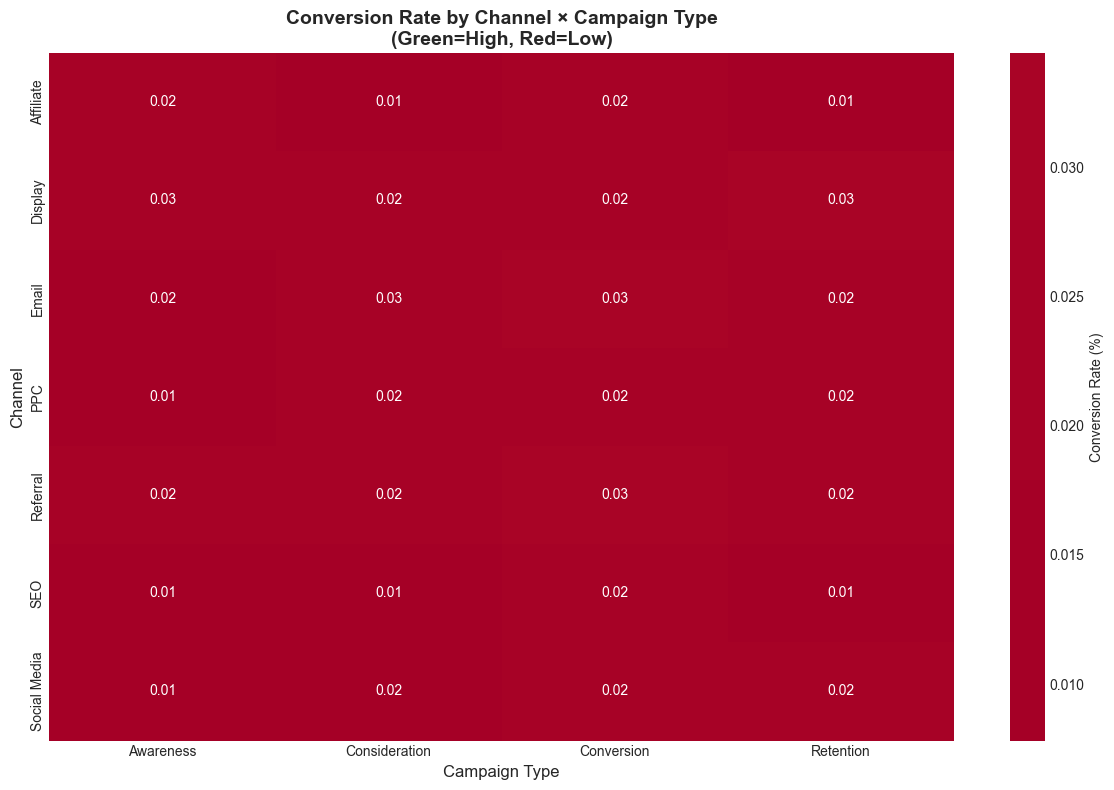


✅ Channel-Campaign interaction saved to: ../reports/03_channels/channel_campaign_interaction.png


In [13]:
print("\n" + "="*70)
print("🎯 CHANNEL × CAMPAIGN TYPE INTERACTION")
print("="*70)

# Cross-tab analysis
channel_campaign = df.groupby(['CampaignChannel', 'CampaignType']).agg({
    'Conversion': 'mean',
    'CustomerID': 'count'
}).reset_index()

channel_campaign.columns = ['Channel', 'CampaignType', 'Conversion_Rate', 'Count']
channel_campaign['Conversion_Rate']

# Pivot for heatmap
pivot_conv = channel_campaign.pivot(index='Channel', columns='CampaignType', values='Conversion_Rate')

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_conv, annot=True, fmt='.2f', cmap='RdYlGn', center=1.3,
            cbar_kws={'label': 'Conversion Rate (%)'})
plt.title('Conversion Rate by Channel × Campaign Type\n(Green=High, Red=Low)',
          fontsize=14, fontweight='bold')
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Channel', fontsize=12)
plt.tight_layout()
plt.savefig('../reports/03_channels/channel_campaign_interaction.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Channel-Campaign interaction saved to: ../reports/03_channels/channel_campaign_interaction.png")

In [14]:
# Find best combinations
best_combos = channel_campaign.nlargest(5, 'Conversion_Rate')
print("\n🏆 TOP 5 CHANNEL × CAMPAIGN COMBINATIONS:")
print(best_combos.to_string(index=False))



🏆 TOP 5 CHANNEL × CAMPAIGN COMBINATIONS:
 Channel  CampaignType  Conversion_Rate  Count
Referral    Conversion         0.034413    988
   Email    Conversion         0.030972   3035
 Display     Retention         0.030928    582
   Email Consideration         0.026411   3029
 Display     Awareness         0.025042    599


#### **STATISTICAL SIGNIFICANCE TESTING**

QUESTION: Channel'lar arasındaki fark istatistiksel olarak anlamlı mı?

Method: ANOVA (Analysis of Variance)
- H0: Tüm channel'ların conversion rate'i aynı
- H1: En az bir channel farklı

In [15]:
print("\n" + "="*70)
print("📊 STATISTICAL SIGNIFICANCE TESTING")
print("="*70)

# Prepare data for ANOVA
channel_groups = [df[df['CampaignChannel'] == ch]['Conversion'].values
                  for ch in df['CampaignChannel'].unique()]


📊 STATISTICAL SIGNIFICANCE TESTING


In [16]:
# ANOVA test
f_stat, p_value = stats.f_oneway(*channel_groups)

print(f"\n🔬 ANOVA TEST RESULTS:")
print(f"   F-statistic: {f_stat:.4f}")
print(f"   P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\n   ✅ SIGNIFICANT (p < 0.05)")
    print(f"   Yorum: Channel'lar arasında conversion rate farkı istatistiksel olarak ANLAMLI.")
    print(f"   Action: Best performing channel'a budget shift yapılabilir.")
else:
    print(f"\n   ❌ NOT SIGNIFICANT (p > 0.05)")
    print(f"   Yorum: Channel'lar arasında anlamlı fark kanıtlanamadı.")

# Pairwise comparisons (Post-hoc)
print(f"\n🔍 PAIRWISE COMPARISONS (Top 3 vs Worst 3):")

top_3 = channel_metrics.nlargest(3, 'Conversion_Rate').index.tolist()
worst_3 = channel_metrics.nsmallest(3, 'Conversion_Rate').index.tolist()

for top_ch in top_3:
    for worst_ch in worst_3:
        group1 = df[df['CampaignChannel'] == top_ch]['Conversion'].values
        group2 = df[df['CampaignChannel'] == worst_ch]['Conversion'].values
        t_stat, p_val = stats.ttest_ind(group1, group2)

        sig = "✅ SIGNIFICANT" if p_val < 0.05 else "❌ NOT SIG"
        print(f"   {top_ch} vs {worst_ch}: p={p_val:.4f} → {sig}")



🔬 ANOVA TEST RESULTS:
   F-statistic: 3.8373
   P-value: 0.000790

   ✅ SIGNIFICANT (p < 0.05)
   Yorum: Channel'lar arasında conversion rate farkı istatistiksel olarak ANLAMLI.
   Action: Best performing channel'a budget shift yapılabilir.

🔍 PAIRWISE COMPARISONS (Top 3 vs Worst 3):
   Referral vs Affiliate: p=0.0531 → ❌ NOT SIG
   Referral vs SEO: p=0.0009 → ✅ SIGNIFICANT
   Referral vs Social Media: p=0.0464 → ✅ SIGNIFICANT
   Email vs Affiliate: p=0.0507 → ❌ NOT SIG
   Email vs SEO: p=0.0001 → ✅ SIGNIFICANT
   Email vs Social Media: p=0.0093 → ✅ SIGNIFICANT
   Display vs Affiliate: p=0.0801 → ❌ NOT SIG
   Display vs SEO: p=0.0066 → ✅ SIGNIFICANT
   Display vs Social Media: p=0.1545 → ❌ NOT SIG


#### **BUSINESS RECOMMENDATIONS**

FRAMEWORK: Data → Insights → Actions

Based on analysis, provide actionable recommendations

In [17]:
print("\n" + "="*70)
print("💡 BUSINESS RECOMMENDATIONS")
print("="*70)

# Calculate key insights
best_channel = channel_metrics['Conversion_Rate'].idxmax()
worst_channel = channel_metrics['Conversion_Rate'].idxmin()
best_roi_channel = channel_metrics['ROI_Proxy'].idxmax()
lowest_cpa = channel_metrics['CPA'].idxmin()

print("\n📊 KEY INSIGHTS:")
print(f"   1. Best Conversion Rate: {best_channel} ({channel_metrics.loc[best_channel, 'Conversion_Rate']*100:.2f}%)")
print(f"   2. Worst Conversion Rate: {worst_channel} ({channel_metrics.loc[worst_channel, 'Conversion_Rate']*100:.2f}%)")
print(f"   3. Best ROI: {best_roi_channel} (Score: {channel_metrics.loc[best_roi_channel, 'ROI_Proxy']:.2f})")
print(f"   4. Lowest CPA: {lowest_cpa} (${channel_metrics.loc[lowest_cpa, 'CPA']:.2f})")

print("\n🎯 ACTIONABLE RECOMMENDATIONS:")

recommendations = []


💡 BUSINESS RECOMMENDATIONS

📊 KEY INSIGHTS:
   1. Best Conversion Rate: Referral (2.43%)
   2. Worst Conversion Rate: Affiliate (1.41%)
   3. Best ROI: Affiliate (Score: 0.82)
   4. Lowest CPA: Referral ($61456.46)

🎯 ACTIONABLE RECOMMENDATIONS:


In [18]:
# Recommendation 1: Budget reallocation
budget_shift = (channel_metrics.loc[best_channel, 'Conversion_Rate'] /
                channel_metrics.loc[worst_channel, 'Conversion_Rate'] - 1) * 100
recommendations.append({
    'Priority': 'HIGH',
    'Action': 'Budget Reallocation',
    'Details': f"Shift budget from {worst_channel} to {best_channel}",
    'Expected Impact': f"+{budget_shift:.0f}% conversion improvement potential",
    'Implementation': f"Reduce {worst_channel} spend by 20%, increase {best_channel} by 20%"
})


In [19]:
# Recommendation 2: Platform optimization
best_platform = platform_metrics['Conversion_Rate'].idxmax()
recommendations.append({
    'Priority': 'MEDIUM',
    'Action': 'Platform Focus',
    'Details': f"Prioritize {best_platform} advertising",
    'Expected Impact': f"Avg conversion: {platform_metrics.loc[best_platform, 'Conversion_Rate']*100:.2f}%",
    'Implementation': f"A/B test campaigns on {best_platform} first"
})

In [20]:
# Recommendation 3: Tool standardization
best_tool = tool_metrics['Conversion_Rate'].idxmax()
recommendations.append({
    'Priority': 'MEDIUM',
    'Action': 'Tool Standardization',
    'Details': f"Standardize on {best_tool} for campaign management",
    'Expected Impact': f"Consistent performance tracking",
    'Implementation': f"Migrate campaigns to {best_tool} Q2 2026"
})


In [21]:
# Print recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. [{rec['Priority']}] {rec['Action']}")
    print(f"   Details: {rec['Details']}")
    print(f"   Expected Impact: {rec['Expected Impact']}")
    print(f"   Implementation: {rec['Implementation']}")

# Save recommendations to file
recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv('../reports/03_channels/channel_recommendations.csv', index=False)

print(f"\n✅ Recommendations saved to: ../reports/03_channels/channel_recommendations.csv")



1. [HIGH] Budget Reallocation
   Details: Shift budget from Affiliate to Referral
   Expected Impact: +72% conversion improvement potential
   Implementation: Reduce Affiliate spend by 20%, increase Referral by 20%

2. [MEDIUM] Platform Focus
   Details: Prioritize Facebook advertising
   Expected Impact: Avg conversion: 2.24%
   Implementation: A/B test campaigns on Facebook first

3. [MEDIUM] Tool Standardization
   Details: Standardize on Hootsuite for campaign management
   Expected Impact: Consistent performance tracking
   Implementation: Migrate campaigns to Hootsuite Q2 2026

✅ Recommendations saved to: ../reports/03_channels/channel_recommendations.csv


#### **SUMMARY & NEXT STEPS**

In [22]:
print("\n" + "="*70)
print("📝 CHANNEL ANALYTICS SUMMARY")
print("="*70)

summary = f"""
ANALYSIS COMPLETED:
==================

1. CHANNEL PERFORMANCE ✅
   - {len(channel_metrics)} channels analyzed
   - Best performer: {best_channel} ({channel_metrics.loc[best_channel, 'Conversion_Rate']*100:.2f}%)
   - Worst performer: {worst_channel} ({channel_metrics.loc[worst_channel, 'Conversion_Rate']*100:.2f}%)

2. PLATFORM ANALYSIS ✅
   - {len(platform_metrics)} platforms compared
   - Best platform: {best_platform}

3. TOOL EFFECTIVENESS ✅
   - {len(tool_metrics)} tools evaluated
   - Best tool: {best_tool}

4. CUSTOMER SEGMENTATION ✅
   - Age group × Channel patterns identified
   - Income tier × Channel patterns identified

5. STATISTICAL VALIDATION ✅
   - ANOVA test: {'Significant' if p_value < 0.05 else 'Not significant'}
   - Pairwise comparisons completed

6. BUSINESS RECOMMENDATIONS ✅
   - {len(recommendations)} actionable recommendations
   - Priority: Budget reallocation to {best_channel}

OUTPUTS GENERATED:
==================
- channel_performance_overview.png
- platform_analysis.png
- tool_effectiveness.png
- customer_segmentation_by_channel.png
- channel_campaign_interaction.png
- channel_recommendations.csv

NEXT STEPS:
===========
→ 04_Model_Comparison.ipynb
   - Train ML models with engineered features
   - Feature selection (top 10-12 features)
   - Hyperparameter tuning
   - Final model deployment
"""

print(summary)

print("\n" + "="*70)
print("✅ CHANNEL ANALYTICS COMPLETED!")
print("="*70)


📝 CHANNEL ANALYTICS SUMMARY

ANALYSIS COMPLETED:

1. CHANNEL PERFORMANCE ✅
   - 7 channels analyzed
   - Best performer: Referral (2.43%)
   - Worst performer: Affiliate (1.41%)

2. PLATFORM ANALYSIS ✅
   - 7 platforms compared
   - Best platform: Facebook

3. TOOL EFFECTIVENESS ✅
   - 6 tools evaluated
   - Best tool: Hootsuite

4. CUSTOMER SEGMENTATION ✅
   - Age group × Channel patterns identified
   - Income tier × Channel patterns identified

5. STATISTICAL VALIDATION ✅
   - ANOVA test: Significant
   - Pairwise comparisons completed

6. BUSINESS RECOMMENDATIONS ✅
   - 3 actionable recommendations
   - Priority: Budget reallocation to Referral

OUTPUTS GENERATED:
- channel_performance_overview.png
- platform_analysis.png
- tool_effectiveness.png
- customer_segmentation_by_channel.png
- channel_campaign_interaction.png
- channel_recommendations.csv

NEXT STEPS:
→ 04_Model_Comparison.ipynb
   - Train ML models with engineered features
   - Feature selection (top 10-12 features)
   